In [ ]:
# 패션 mnist 데이터 셋

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# 데이터 적재

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)


(60000, 28, 28)
uint8


In [ ]:
# 검증 세트는 없으므로 훈련 세트의 앞 부분 5,000개를 검증 세트로 사용하자
# 특성의 스케일을 0~1사이 조정하자

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
# y의 범위 0~9 각각은 다음 패션 아이템을 의미

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
               'Sneaker','Bag','Ankle boot']

class_names[y_train[0]]


'Coat'

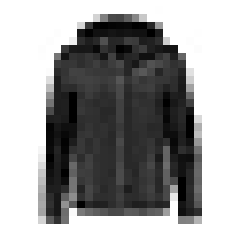

In [ ]:
# 이미지 확인해 보기
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

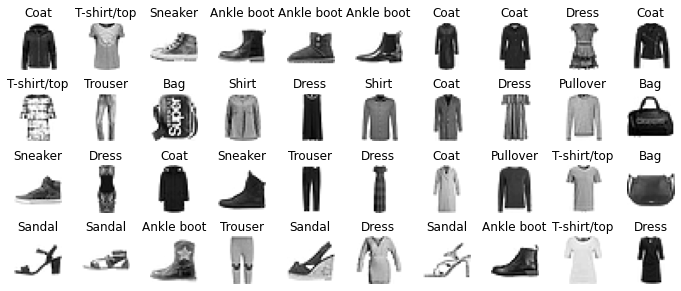

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col            # index = 0, 1, ….., 9, 10,…
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)   # subplots 사이 여백 
plt.show()


In [ ]:
# Sequencial API로 모델 만들기
model = keras.models.Sequential()
# Flatten층은 입력 이미지를 1D배열로 변환함
model.add(keras.layers.Flatten(input_shape=[28, 28]))

In [ ]:
# 은닉층과 출력층 추가
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 인덱스나 이름으로 층을 선택
# model.layers
for i in range(4):
    print(model.layers[i].name)
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)


flatten
dense
dense_1
dense_2
(784, 300)
(300,)


In [ ]:
# 모델 컴파일
# label이 원-핫 벡터이면 'categorical_crossentropy' 사용해야함
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
# 모델 훈련과 평가
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 10s 4ms/step - loss: 0.7242 - accuracy: 0.7628 - val_loss: 0.4947 - val_accuracy: 0.8330
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4836 - accuracy: 0.8327 - val_loss: 0.5114 - val_accuracy: 0.8218
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4379 - accuracy: 0.8469 - val_loss: 0.4108 - val_accuracy: 0.8642
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4118 - accuracy: 0.8550 - val_loss: 0.3959 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3919 - accuracy: 0.8622 - val_loss: 0.3835 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3755 - accuracy: 0.8678 - val_loss: 0.3632 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3614 - accuracy: 0.8724 - val_loss: 0.3651 - val_accuracy

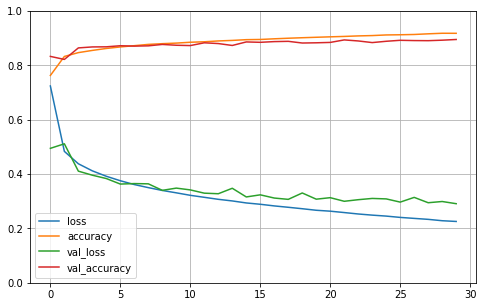

In [ ]:
# pandas모듈로 history출력 지표들 그리기

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3329 - accuracy: 0.8797


[0.33285027742385864, 0.8797000050544739]

In [ ]:
# 모델을 사용해 예측 만들기
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

import numpy as np
#다른 방식으로 보기
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

np.array(class_names)[y_pred]
y_new = y_test[:3]
y_new


array([9, 2, 1], dtype=uint8)

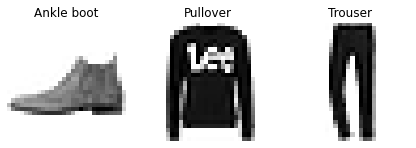

In [ ]:
#예측한 그림 보기
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
